In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
print(tf.__version__)
# 20231225 應該是當初安裝時程式有異，所以keras沒抓到tensorflow預設的版本
# 20240104 tf2.10 version can run
print(keras.__version__)


2.10.0
2.10.0


In [5]:
# For test HPNB (Windows) tensorflow env is OK
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [6]:
# For test HPNB (Windows) tensorflow env is OK
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
938/938 [==============================] - 52s 51ms/step - loss: 0.1779 - accuracy: 0.9438
Epoch 2/5
938/938 [==============================] - 51s 55ms/step - loss: 0.0475 - accuracy: 0.9849
Epoch 3/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0332 - accuracy: 0.9896
Epoch 4/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0252 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0203 - accuracy: 0.9941


In [7]:
import sys
sys.platform

'win32'

In [8]:
# § 代碼清單 5-4 將圖像複製到訓練、驗證和測試的目錄 (要依執行平台修正相對應的路徑)
import os, shutil, sys

#--- FOR Path Settings ---#
original_dataset_dir = ""
base_dir = ""
if sys.platform == 'linux' :
    original_dataset_dir = '/home/earvin/workspaces/datasets/kaggle_original_data'
    base_dir = '/home/earvin/workspaces/datasets/cats_and_dogs_small'
elif sys.platform == 'darwin' :
    original_dataset_dir = '/Users/earvin/workspaces/datasets/kaggle_original_data'
    base_dir = '/Users/earvin/workspaces/datasets/cats_and_dogs_small'
elif sys.platform == 'win32' : # 20240109 Add windows path (for vivopc)
    original_dataset_dir = 'E:\\WORKSPACES\\Datasets\\kaggle_original_data'
    base_dir = 'E:\\WORKSPACES\\Datasets\\cats_and_dogs_small'
    
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

# 分別對應劃分後的訓練、驗證和測試的目錄
train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.isdir(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir):
    os.mkdir(test_dir)

# 貓、狗的訓練圖像目錄
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.isdir(train_cats_dir):
    os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.isdir(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# 貓、狗的驗證圖像目錄
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.isdir(validation_cats_dir):
    os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.isdir(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# 貓、狗的測試圖像目錄
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.isdir(test_cats_dir):
    os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.isdir(test_dogs_dir):
    os.mkdir(test_dogs_dir)

In [9]:
# § 代碼清單 5-4 將圖像複製到訓練、驗證和測試的目錄 : 複製檔案 (要依執行平台修正相對應的路徑)

# Cats
#fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Dogs
#fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
# check copy status
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('total test cat images: ', len(os.listdir(test_cats_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))


total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test dog images:  500


In [11]:
# 要run 5.8前要先完成5.5 ~ 5.7
# 5.5
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 128)     

In [13]:
# 5.6
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [14]:
# 5.7
from keras.preprocessing.image import ImageDataGenerator
import sys

train_dir = ""
validation_dir = ""
if sys.platform == 'linux' :
    train_dir = "/home/earvin/workspaces/datasets/cats_and_dogs_small/train"
    validation_dir = "/home/earvin/workspaces/datasets/cats_and_dogs_small/validation"
elif sys.platform == 'darwin' :
    train_dir = "/Users/earvin/workspaces/datasets/cats_and_dogs_small/train"
    validation_dir = "/Users/earvin/workspaces/datasets/cats_and_dogs_small/validation"
elif sys.platform == 'win32' :
    train_dir = "E:\\WORKSPACES\\Datasets\\cats_and_dogs_small\\train"
    validation_dir = "E:\\WORKSPACES\\Datasets\\cats_and_dogs_small\\validation"


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
# 5.8
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

C:\Users\linea\AppData\Local\Temp\ipykernel_16564\2223947943.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 86s 826ms/step - loss: 0.6922 - acc: 0.5315 - val_loss: 0.6809 - val_acc: 0.5110
Epoch 2/30
100/100 [==============================] - 84s 834ms/step - loss: 0.6630 - acc: 0.6090 - val_loss: 0.7057 - val_acc: 0.5310
Epoch 3/30
100/100 [==============================] - 80s 797ms/step - loss: 0.6309 - acc: 0.6455 - val_loss: 0.6376 - val_acc: 0.6390
Epoch 4/30
100/100 [==============================] - 78s 775ms/step - loss: 0.5872 - acc: 0.6910 - val_loss: 0.6017 - val_acc: 0.6620
Epoch 5/30
100/100 [==============================] - 73s 729ms/step - loss: 0.5528 - acc: 0.7140 - val_loss: 0.5970 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 74s 740ms/step - loss: 0.5174 - acc: 0.7465 - val_loss: 0.5679 - val_acc: 0.6940
Epoch 7/30
100/100 [==============================] - 71s 708ms/step - loss: 0.4948 - acc: 0.7620 - val_loss: 0.6671 - val_acc: 0.6270
Epoch 8/30
100/100 [==============================] - 7

In [16]:
# § 代碼清單 5-9 保存模型
model.save('cats_and_dogs_small_1.h5')

In [ ]:
# § 代碼清單 5-10 繪製訓練過程中的損失曲線和精度曲線
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#--- TEST h5 document --
import h5py, sys

thePath =''
if sys.platform == 'linux' :
    thePath ='/home/earvin/workspaces/GithubProjects/tensorflow/scripts/BOOK_DLWP2018/'
elif sys.platform == 'darwin' :
    thePath ='/Users/earvin/workspaces/GithubProjects/tensorflow/scripts/BOOK_DLWP2018/'
elif sys.platform == 'win32' : # 20240109 Add windows path (for vivopc)
    thePath ='E:\\WORKSPACES\\GithubProjects\\tensorflow\\scripts\\BOOK_DLWP2018\\'
    
f = h5py.File(thePath + 'cats_and_dogs_small_1.h5','r')
f.keys() #可以查看所有的主键
print([key for key in f.keys()])

In [ ]:
# Listing 5.11 Setting up a data augmentation configuration via ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
# 5.12
#--- hpnb vm_ubuntu , tensorflow = 2.4 use
##from keras.preprocessing import image
#--- iMac / linux use , tensorflow = 2.10
from keras.utils import image_utils
import sys, os

train_cats_dir = ""
if sys.platform == "linux" :
    train_cats_dir = "/home/earvin/workspaces/datasets/cats_and_dogs_small/train/cats"
elif sys.platform == "darwin" :
    train_cats_dir = "/Users/earvin/workspaces/datasets/cats_and_dogs_small/train/cats"
elif sys.platform == 'win32' : # 20240109 Add windows path (for vivopc)
    train_cats_dir ='E:\\WORKSPACES\\Datasets\\cats_and_dogs_small\\train\\cats'
    
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
#print(fnames)

img_path = fnames[3]
#print(fnames[3])

#--- hpnb vm_ubuntu , tensorflow = 2.4 use
#img = image.load_img(img_path, target_size=(150, 150))
#x = image.img_to_array(img)
#--- iMac / linux use , tensorflow = 2.10
img = tf.keras.utils.load_img(img_path, target_size=(150, 150))
x = tf.keras.utils.img_to_array(img)


x = x.reshape((1,) + x.shape)
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    #--- hpnb vm_ubuntu , tensorflow = 2.4 use
#    imgplot = plt.imshow(image.array_to_img(batch[0]))
    #--- iMac / linux use , tensorflow = 2.10
    imgplot = plt.imshow(tf.keras.utils.array_to_img(batch[0]))
    
    i += 1
    if i % 4 == 0:
        break

plt.show()


In [ ]:
# Listing 5.13 Defining a new convnet that includes dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [ ]:
print(train_dir)

In [ ]:
# Listing 5.14 Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# 2023.12.19 hpnb好像跑不完；用ai-pc試跑看看~~
"""
Ref Addr : https://cloud.tencent.com/developer/article/1725310
generator: 
一個生成器，或一個Sequence (keras.utils.Sequence) 物件的實例， 以在使用多進程時避免資料的重複。
生成器的輸出應該為以下之一：
一個(inputs, targets) 元組 / 一個(inputs, targets, sample_weights) 元組。
steps_per_epoch: 
在聲明一個epoch 完成並開始下一個epoch 之前從generator產生的總步數（批次樣本）。
它通常應該等於你的資料集的樣本數量除以批量大小。對於Sequence，它是可選的：
如果未指定，則將使用len(generator)作為步數。
epochs: 
整數。訓練模型的迭代總輪數。
一個epoch 是對所提供的整個資料的一輪迭代，如steps_per_epoch 所定義。
注意，與initial_epoch 一起使用，epoch 應被理解為“最後一輪”。
模型沒有經歷由epochs 給出的多次迭代的訓練，而僅僅是直到達到索引epoch 的輪次。
verbose: 0, 1 或2。日誌顯示模式。0 = 安靜模式, 1 = 進度條, 2 = 每輪一行。
callbacks: keras.callbacks.Callback 實例的列表。在訓練時呼叫的一系列回調函數。
validation_data:
驗證資料的生成器或Sequence實例
一個(inputs, targets) 元組 / 一個(inputs, targets, sample_weights) 元組。
在每個epoch 結束時評估損失和任何模型指標。該模型不會對此資料進行訓練。
validation_steps: 
僅當validation_data 是一個生成器時才可用。在停止前generator 產生的總步數（樣本批數）。
對於Sequence，它是可選的：如果未指定，則將使用len(generator) 作為步數。
class_weight: 
可選的將類別索引（整數）對應到權重（浮點）值的字典，用於加權損失函數（僅在訓練期間）。
這可以用來告訴模型「更關注」來自代表性不足的類別的樣本。
max_queue_size: 整數。生成器隊列的最大尺寸。如未指定，max_queue_size 將預設為10。
workers: 整數。使用的最大進程數量，如果使用基於進程的多執行緒。如未指定，workers 將預設為1。如果為0，則會在主執行緒上執行生成器。
use_multiprocessing: 布林值。如果True，則使用基於行程的多執行緒。如未指定， use_multiprocessing 將預設為False。請注意，由於此實作依賴於多進程，所以不應將不可傳遞的參數傳遞給生成器，因為它們不能輕易地傳遞給子進程。
shuffle: 是否在每輪迭代之前打亂batch 的順序。只能與Sequence (keras.utils.Sequence) 實例同用。
initial_epoch: 開始訓練的輪次（有助於恢復先前的訓練）。
"""

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=80,
    validation_data=validation_generator,
    validation_steps=50)

In [ ]:
# Listing 5.15 Saving the model
model.save('cats_and_dogs_small_2.h5')

In [28]:
# === Test VGG16 Model ===#
# Listing 5.16 Instantiating the VGG16 convolutional base
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [29]:
# Listing 5.17 Extracting features using the pretrained convolutional base
import os, sys
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

if sys.platform == "linux" :
    base_dir = '/home/earvin/workspaces/datasets/cats_and_dogs_small/'
elif sys.platform == "darwin" :
    base_dir = '/Users/earvin/workspaces/datasets/cats_and_dogs_small/'
elif sys.platform == 'win32' : # 20240109 Add windows path (for vivopc)
    base_dir = 'E:\\WORKSPACES\\Datasets\\cats_and_dogs_small\\'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512)) # 最後出來的形狀
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch) # call conv_base
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)


Found 2000 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step


In [30]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [31]:
# Listing 5.18 Defining and training the densely connected classifier
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_features, train_labels, 
                    epochs=30, batch_size=20, 
                    validation_data=(validation_features, validation_labels))


Epoch 1/30
100/100 [==============================] - 2s 20ms/step - loss: 0.5636 - acc: 0.7110 - val_loss: 0.4245 - val_acc: 0.8420
Epoch 2/30
100/100 [==============================] - 2s 19ms/step - loss: 0.4167 - acc: 0.8170 - val_loss: 0.3509 - val_acc: 0.8710
Epoch 3/30
100/100 [==============================] - 2s 20ms/step - loss: 0.3513 - acc: 0.8650 - val_loss: 0.3167 - val_acc: 0.8750
Epoch 4/30
100/100 [==============================] - 2s 17ms/step - loss: 0.3100 - acc: 0.8695 - val_loss: 0.2909 - val_acc: 0.8920
Epoch 5/30
100/100 [==============================] - 2s 18ms/step - loss: 0.2827 - acc: 0.8870 - val_loss: 0.2757 - val_acc: 0.8980
Epoch 6/30
100/100 [==============================] - 2s 17ms/step - loss: 0.2654 - acc: 0.8955 - val_loss: 0.2674 - val_acc: 0.9010
Epoch 7/30
100/100 [==============================] - 2s 17ms/step - loss: 0.2406 - acc: 0.9075 - val_loss: 0.2763 - val_acc: 0.8810
Epoch 8/30
100/100 [==============================] - 2s 24ms/step - 

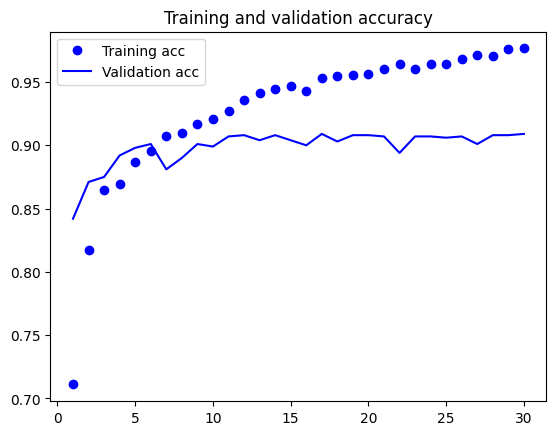

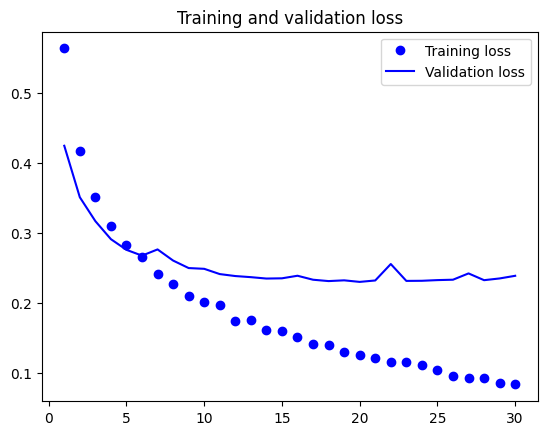

In [32]:
# Listing 5.19 Plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [33]:
# Listing 5.20 Adding a densely connected classifier on top of the convolutional base
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [34]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [35]:
conv_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [ ]:
# Listing 5.21 Training the model end to end with a frozen convolutional base
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

model.compile(
    loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
    validation_data=validation_generator, validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/tmp/ipykernel_3180/1755523074.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
2024-01-07 22:27:38.664886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 0.5830 - acc: 0.7070

2024-01-07 22:31:52.816745: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - 396s 4s/step - loss: 0.5830 - acc: 0.7070 - val_loss: 0.4484 - val_acc: 0.8250
Epoch 2/30
100/100 [==============================] - 400s 4s/step - loss: 0.4843 - acc: 0.7855 - val_loss: 0.3733 - val_acc: 0.8450
Epoch 3/30
100/100 [==============================] - 398s 4s/step - loss: 0.4328 - acc: 0.8075 - val_loss: 0.3327 - val_acc: 0.8560
Epoch 4/30
100/100 [==============================] - 394s 4s/step - loss: 0.4108 - acc: 0.8125 - val_loss: 0.3093 - val_acc: 0.8840
Epoch 5/30
100/100 [==============================] - 395s 4s/step - loss: 0.3842 - acc: 0.8325 - val_loss: 0.2987 - val_acc: 0.8740
Epoch 6/30
100/100 [==============================] - 75177s 759s/step - loss: 0.3695 - acc: 0.8340 - val_loss: 0.2879 - val_acc: 0.8890
Epoch 7/30
 57/100 [================>.............] - ETA: 1:56 - loss: 0.3578 - acc: 0.8404

In [ ]:
conv_base.summary()

In [35]:
# Listing 5.22 Freezing all layers up to a specific one
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [36]:
# Listing 5.23 Fine-tuning the model
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])
history = model.fit_generator(
    train_generator, steps_per_epoch=100, epochs=100,
    validation_data=validation_generator, validation_steps=50)


Epoch 1/100


/tmp/ipykernel_2081/1577043451.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 8s 79ms/step - loss: 0.2929 - acc: 0.8740 - val_loss: 0.2247 - val_acc: 0.9070
Epoch 2/100
100/100 [==============================] - 8s 78ms/step - loss: 0.2619 - acc: 0.8835 - val_loss: 0.2033 - val_acc: 0.9200
Epoch 3/100
100/100 [==============================] - 8s 77ms/step - loss: 0.2459 - acc: 0.8905 - val_loss: 0.1919 - val_acc: 0.9230
Epoch 4/100
100/100 [==============================] - 8s 78ms/step - loss: 0.2154 - acc: 0.9115 - val_loss: 0.1937 - val_acc: 0.9230
Epoch 5/100
100/100 [==============================] - 8s 78ms/step - loss: 0.2167 - acc: 0.9120 - val_loss: 0.1867 - val_acc: 0.9300
Epoch 6/100
100/100 [==============================] - 8s 78ms/step - loss: 0.1922 - acc: 0.9200 - val_loss: 0.1839 - val_acc: 0.9320
Epoch 7/100
100/100 [==============================] - 8s 78ms/step - loss: 0.1937 - acc: 0.9230 - val_loss: 0.1775 - val_acc: 0.9280
Epoch 8/100
100/100 [==============================] - 8s 78ms/step - loss

Epoch 62/100
100/100 [==============================] - 8s 78ms/step - loss: 0.0253 - acc: 0.9925 - val_loss: 0.2164 - val_acc: 0.9400
Epoch 63/100
100/100 [==============================] - 8s 78ms/step - loss: 0.0316 - acc: 0.9900 - val_loss: 0.2470 - val_acc: 0.9340
Epoch 64/100
100/100 [==============================] - 8s 78ms/step - loss: 0.0298 - acc: 0.9905 - val_loss: 0.2792 - val_acc: 0.9290
Epoch 65/100
100/100 [==============================] - 8s 78ms/step - loss: 0.0275 - acc: 0.9895 - val_loss: 0.2086 - val_acc: 0.9430
Epoch 66/100
100/100 [==============================] - 8s 78ms/step - loss: 0.0273 - acc: 0.9915 - val_loss: 0.2229 - val_acc: 0.9390
Epoch 67/100
100/100 [==============================] - 8s 78ms/step - loss: 0.0304 - acc: 0.9900 - val_loss: 0.2421 - val_acc: 0.9310
Epoch 68/100
100/100 [==============================] - 8s 77ms/step - loss: 0.0300 - acc: 0.9900 - val_loss: 0.3010 - val_acc: 0.9310
Epoch 69/100
100/100 [==============================] -

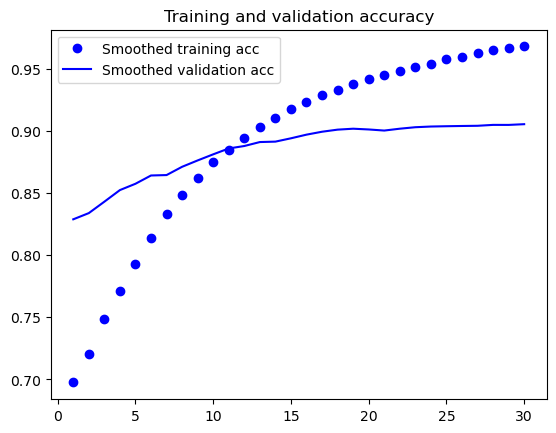

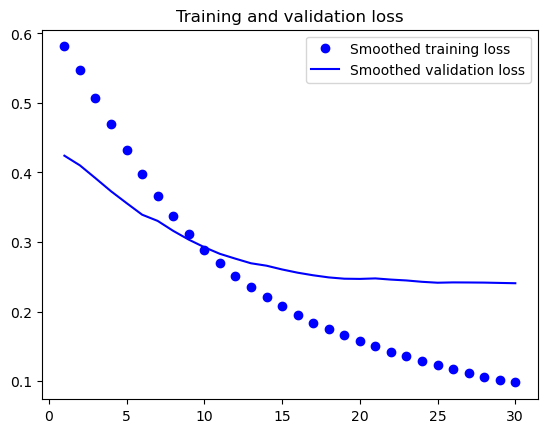

In [37]:
# Listing 5.24 Smoothing the plots
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [41]:
# TEST
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


/tmp/ipykernel_2081/1770435578.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.9449999928474426


In [46]:
# TEST
#--- 以下為書上的寫法，在tensorflow=2.10上不能run --
#from keras.models import load_mode
#model = load_model('cats_and_dogs_small_2.h5')

#--- can run on linux, tensorflow=2.10
from tensorflow import keras
model = keras.models.load_model('cats_and_dogs_small_2.h5')

model.summary() # As a reminder.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

In [49]:
# Listing 5.25 Preprocessing a single image
#img_path = '/home/earvin/workspaces/datasets/cats_and_dogs_small/test/cats/cat.1700.jpg'

if sys.platform == 'linux' :
    img_path = '/home/earvin/workspaces/datasets/cats_and_dogs_small/test/cats/1700.jpg'
elif sys.platform == 'darwin' :
    img_path = '/Users/earvin/workspaces/datasets/cats_and_dogs_small/test/cats/1700.jpg'
elif sys.platform == 'win32' : # 20240109 Add windows path (for vivopc)
    img_path = 'E:\\WORKSPACES\\Datasets\\cats_and_dogs_small\\test\\cats\\1700.jpg'

#--- iMac / linux use , tensorflow = 2.10
#from keras.preprocessing import image
from keras.utils import image_utils

import numpy as np

#--- iMac / linux use , tensorflow = 2.10
#img = image.load_img(img_path, target_size=(150, 150))
#img_tensor = image.img_to_array(img)
img = tf.keras.utils.load_img(img_path, target_size=(150, 150))
img_tensor = tf.keras.utils.img_to_array(img)

img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


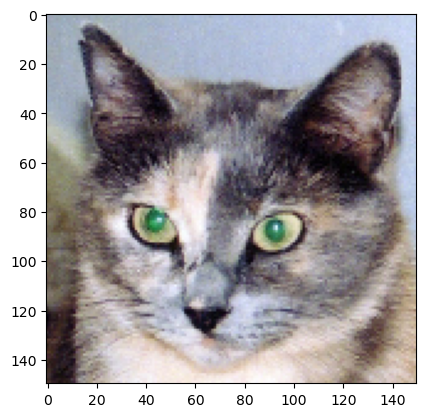

In [50]:
# Listing 5.26 Displaying the test picture
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [51]:
# Listing 5.27 Instantiating a model from an input tensor and a list of output tensors
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [52]:
# Listing 5.28 Running the model in predict mode
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 95ms/step


In [53]:
# TEST
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


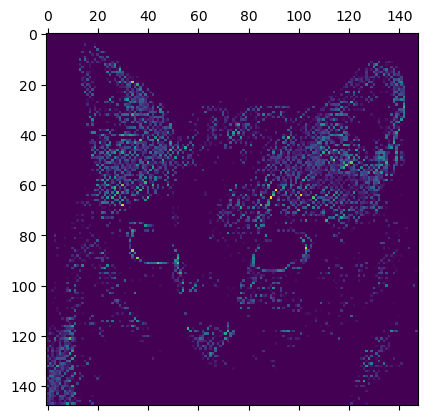

In [54]:
# Listing 5.29 Visualizing the fourth channel
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

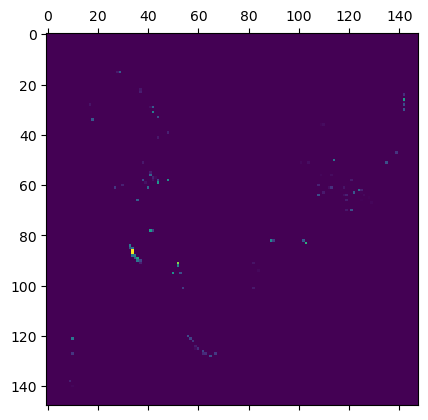

In [55]:
# Listing 5.30 Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')


/tmp/ipykernel_2081/2137295340.py:17: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
/tmp/ipykernel_2081/2137295340.py:20: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype('uint8')


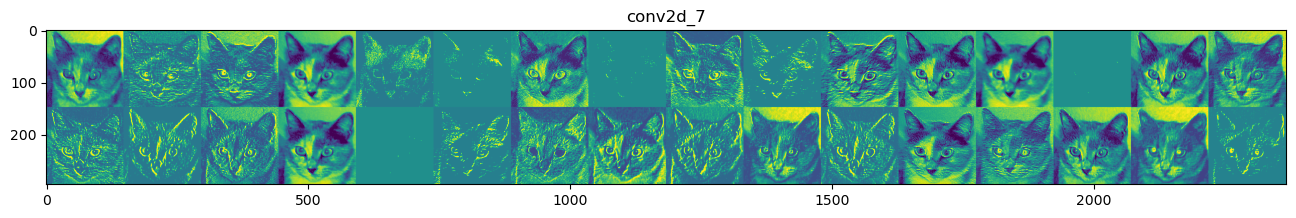

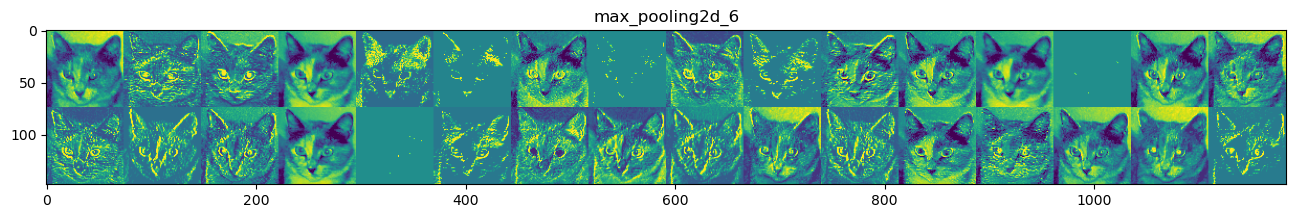

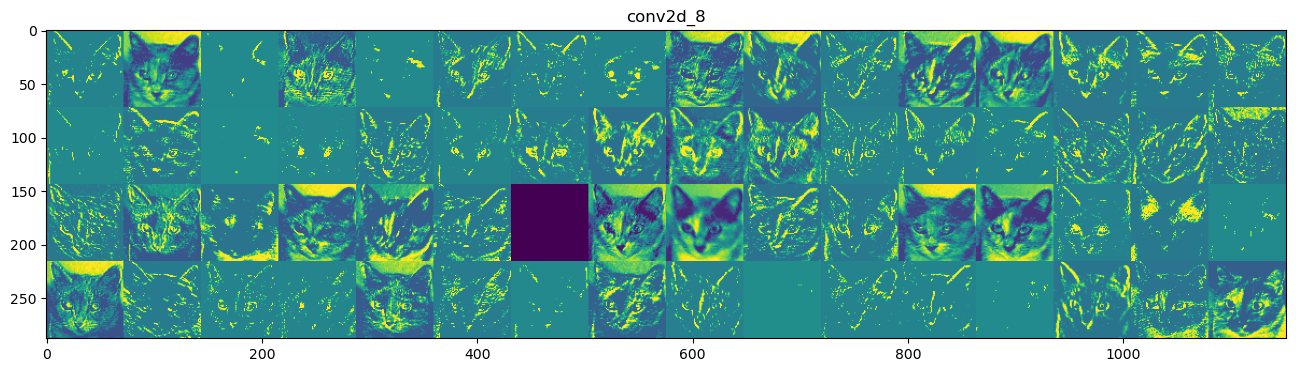

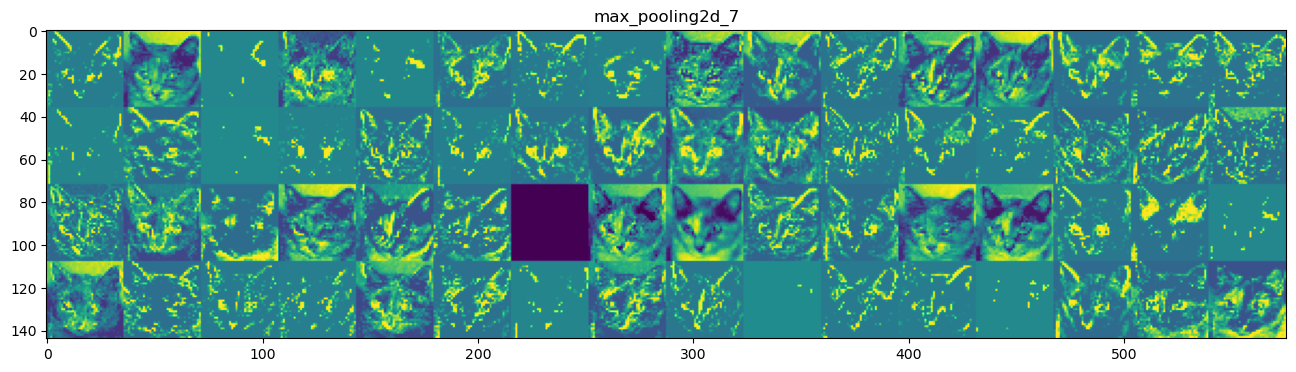

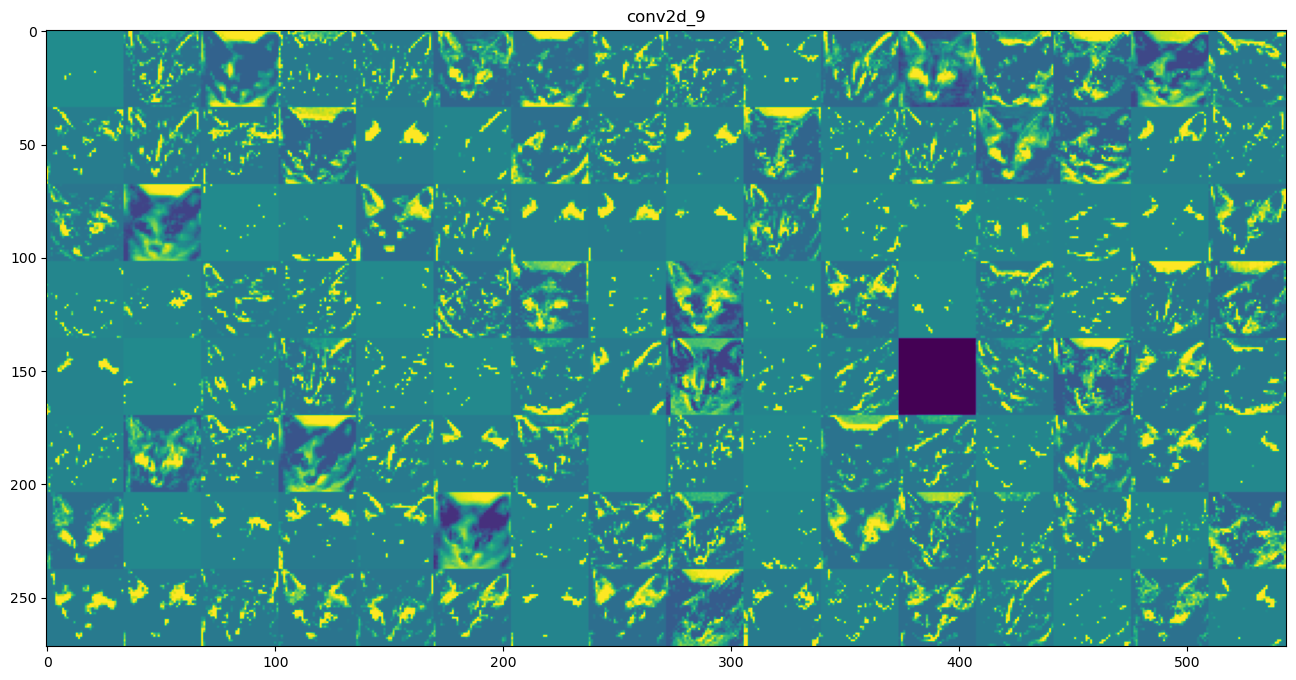

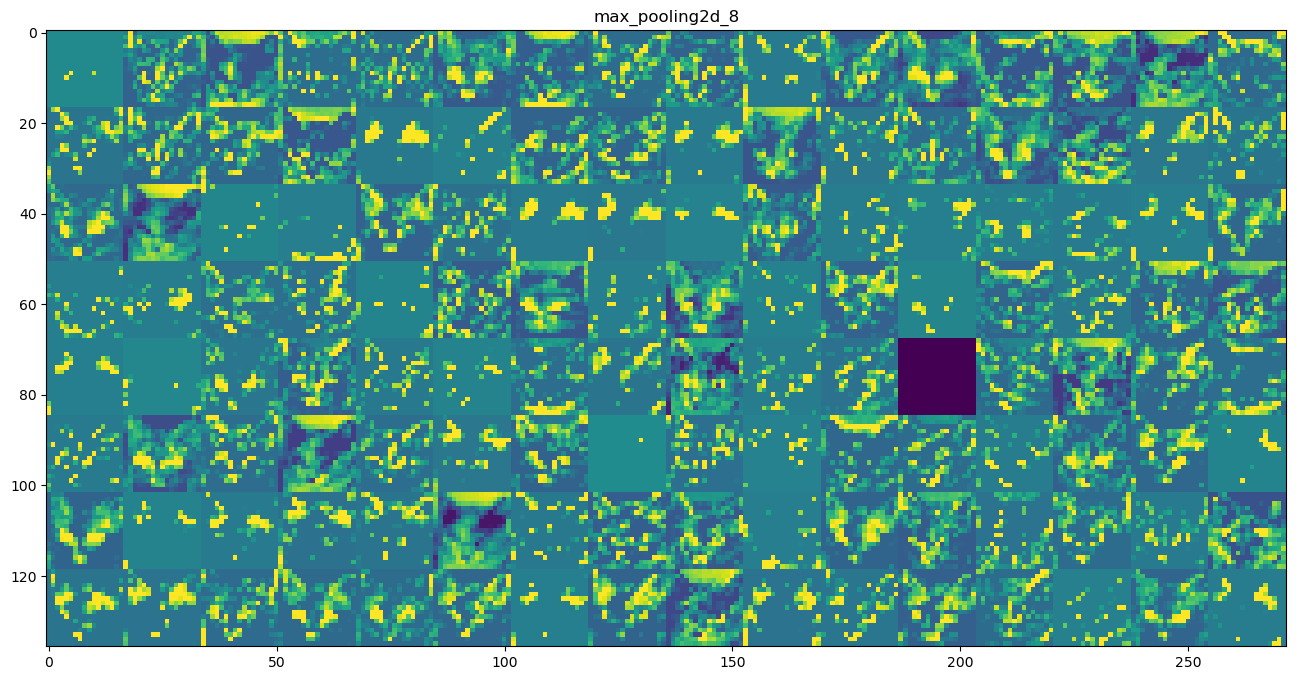

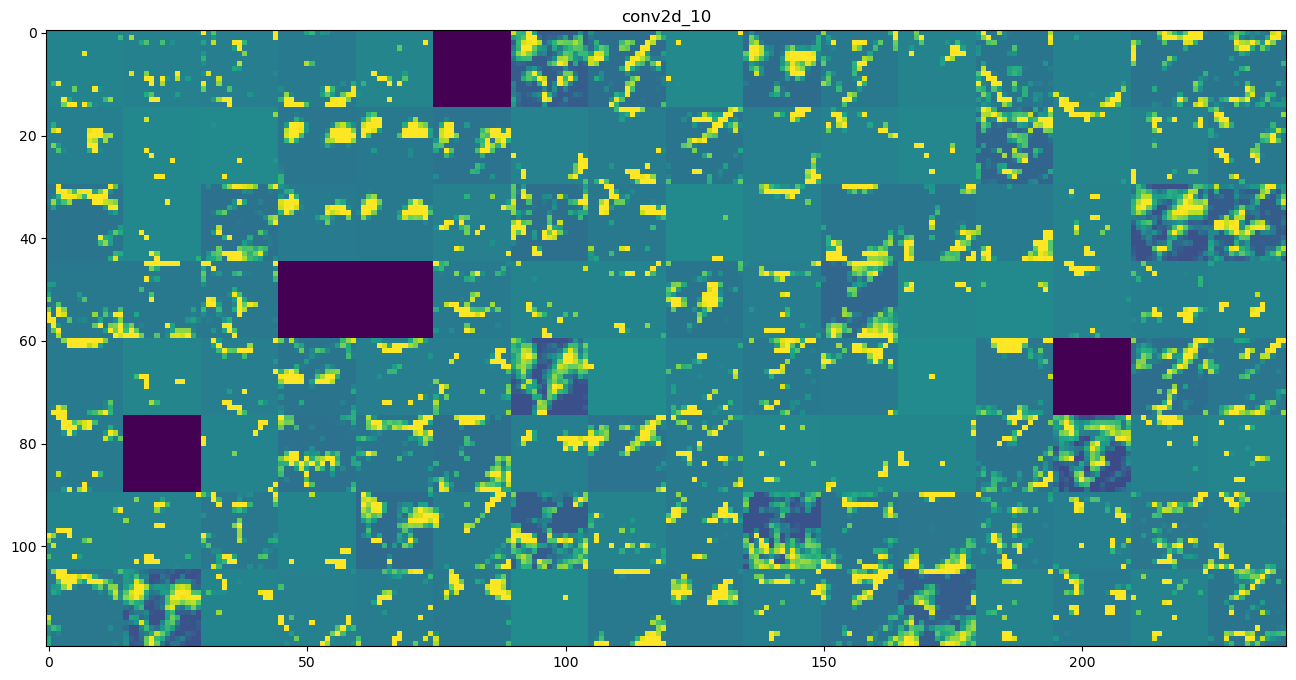

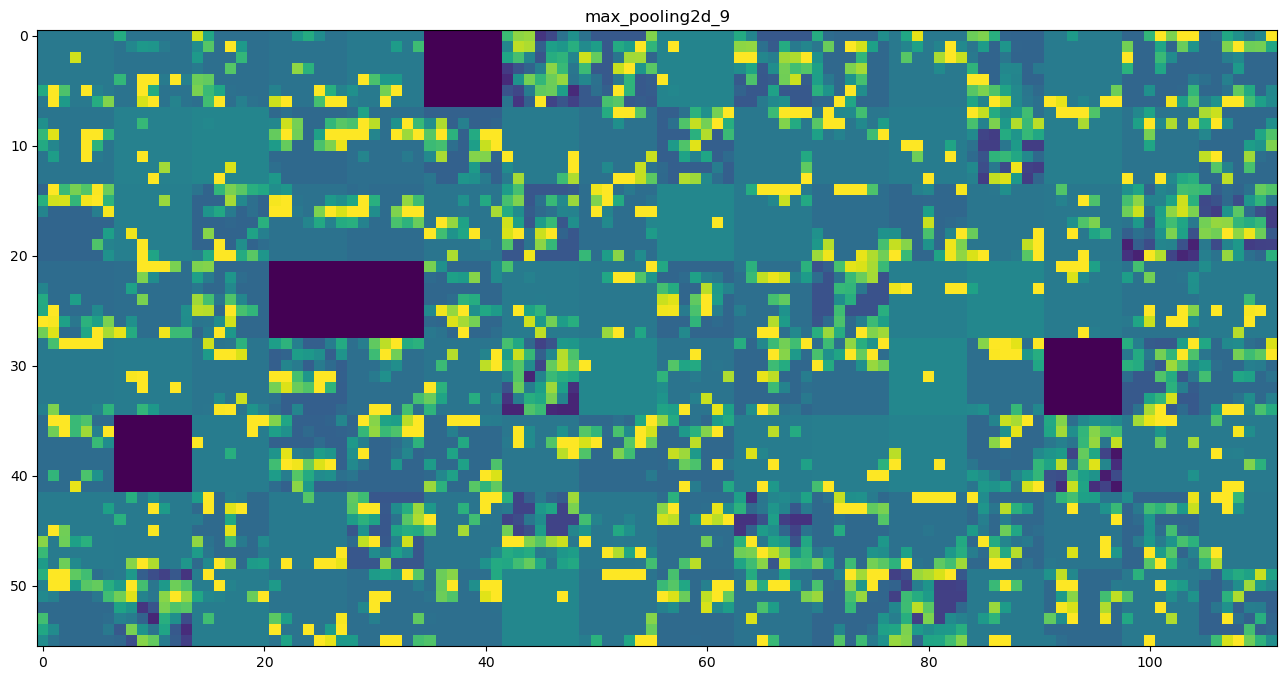

In [56]:
# Listing 5.31 Visualizing every channel in every intermediate activation
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [60]:
# Listing 5.32 Defining the loss tensor for filter visualization
from keras.applications import VGG16
from keras import backend as K

#-- 20240107 沒加這行會有問題 --
#import tensorflow as tf
tf.compat.v1.disable_eager_execution()

model = VGG16(weights='imagenet', include_top=False)
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [61]:
# Listing 5.33 Obtaining the gradient of the loss with regard to the input
grads = K.gradients(loss, model.input)[0]
tf.GradientTape

tensorflow.python.eager.backprop.GradientTape

In [62]:
# Listing 5.34 Gradient-normalization trick
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [63]:
# Listing 5.35 Fetching Numpy output values given Numpy input values
iterate = K.function([model.input], [loss, grads])
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [64]:
# Listing 5.36 Loss maximization via stochastic gradient descent
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

In [65]:
# Listing 5.37 Utility function to convert a tensor into a valid image
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [66]:
# Listing 5.38 Function to generate filter visualizations
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)

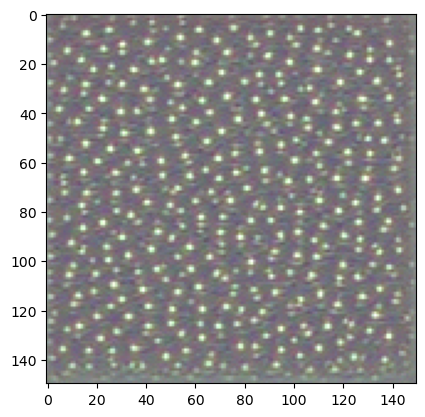

In [68]:
# Test
plt.imshow(generate_pattern('block3_conv1', 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


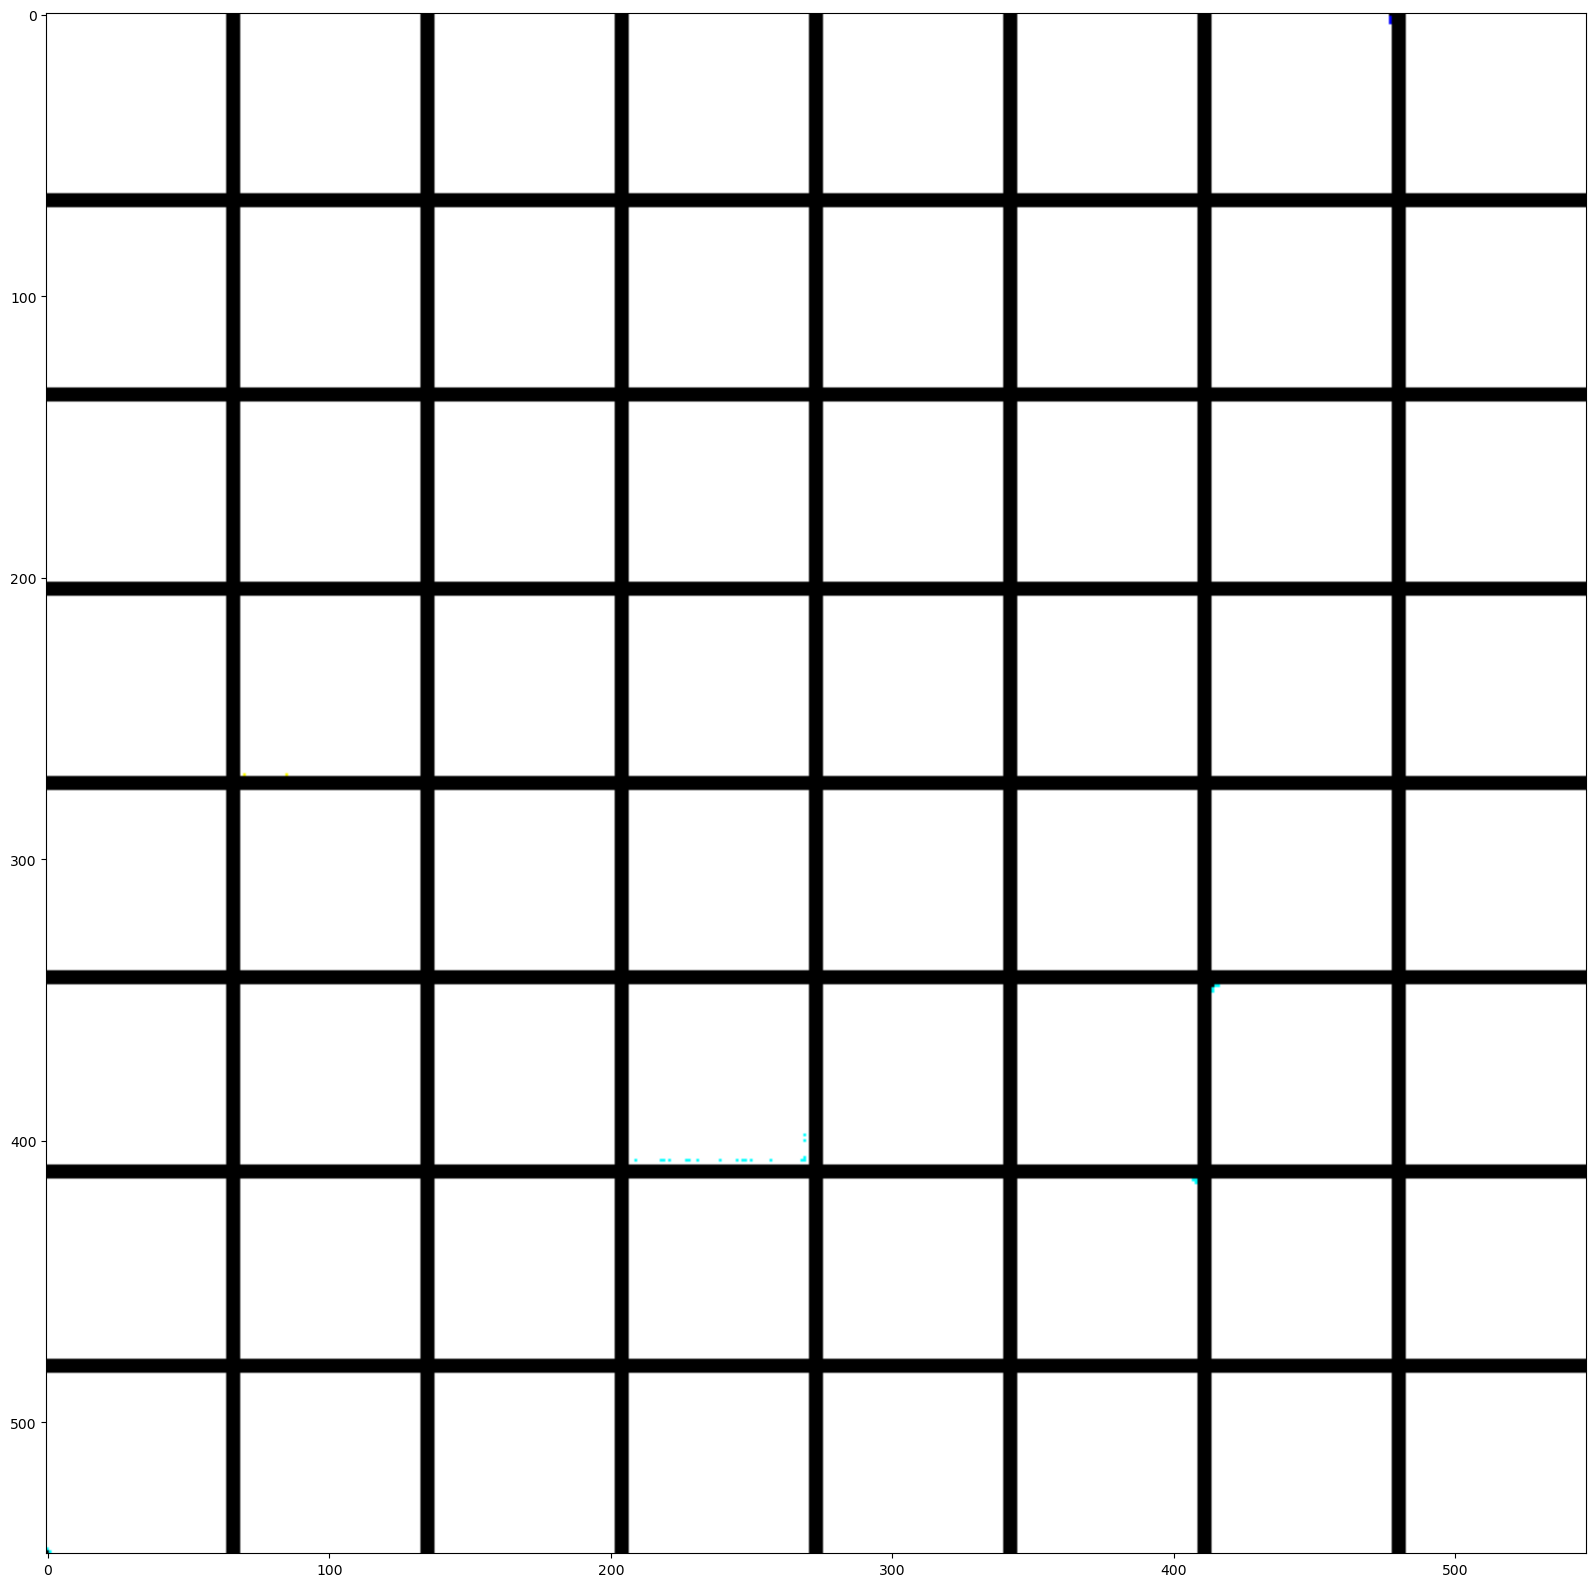

In [69]:
# Listing 5.39 Generating a grid of all filter response patterns in a layer
layer_name = 'block1_conv1'
size = 64
margin = 5
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))
for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

plt.figure(figsize=(20, 20))
plt.imshow(results)

In [70]:
# Listing 5.40 Loading the VGG16 network with pretrained weights
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

553467096/553467096 [==============================] - 765s 1us/step


In [76]:
# Listing 5.41 Preprocessing an input image for VGG16
#--- iMac / linux use , tensorflow = 2.10
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
#from keras.preprocessing import image
from keras.utils import image_utils

if sys.platform == 'linux' :
    img_path = '/home/earvin/workspaces/datasets/creative_commons_elephant.jpg'
elif sys.platform == 'darwin' :
    img_path = '/Users/earvin/workspaces/datasets/creative_commons_elephant.jpg'
elif sys.platform == 'win32' : # 20240109 Add windows path (for vivopc)
img_path = 'E:\\WORKSPACES\\Datasets\\creative_commons_elephant.jpg'

#--- iMac / linux use , tensorflow = 2.10
#img = image.load_img(img_path, target_size=(224, 224))
#x = image.img_to_array(img)
img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
x = tf.keras.utils.img_to_array(img)

x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [77]:
# TEST
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504458', 'African_elephant', 0.90942144), ('n01871265', 'tusker', 0.08618243), ('n02504013', 'Indian_elephant', 0.0043545766)]


In [78]:
# TEST
np.argmax(preds[0])

386

In [79]:
# Listing 5.42 Setting up the Grad-CAM algorithm
#african_e66lephant_output = model.output[:, 386]
african_elephant_output = model.output[:, 386]
last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

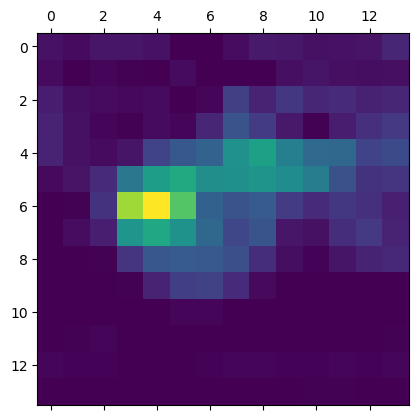

In [80]:
#　Listing 5.43 Heatmap post-processing
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [84]:
# Listing 5.44 Superimposing the heatmap with the original picture
import cv2

img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
#cv2.imwrite('/Users/fchollet/Downloads/elephant_cam.jpg', superimposed_img)

if sys.platform == 'linux' :
    cv2.imwrite('/home/earvin/workspaces/datasets/elephant_cam.jpg', superimposed_img)
elif sys.platform == 'darwin' :
    cv2.imwrite('/Users/earvin/workspaces/datasets/elephant_cam.jpg', superimposed_img)
elif sys.platform == 'win32' : # 20240109 Add windows path (for vivopc)
    cv2.imwrite('E:\\WORKSPACES\\Datasets\\elephant_cam.jpg', superimposed_img)


True